In [1]:
# Import necessary libraries for data analysis and visualization

# NumPy for numerical computations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for statistical data visualization
import seaborn as sns

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ignore warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file containing Microsoft stock price data
data = pd.read_csv('/kaggle/input/exxon-mobil-stock-price-data/exxon_stock_data.csv')

In [3]:
# searching for missing values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Describe the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2388 non-null   object 
 1   Open       2388 non-null   float64
 2   High       2388 non-null   float64
 3   Low        2388 non-null   float64
 4   Close      2388 non-null   float64
 5   Adj Close  2388 non-null   float64
 6   Volume     2388 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 130.7+ KB


In [5]:
# Convert the 'Date' column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

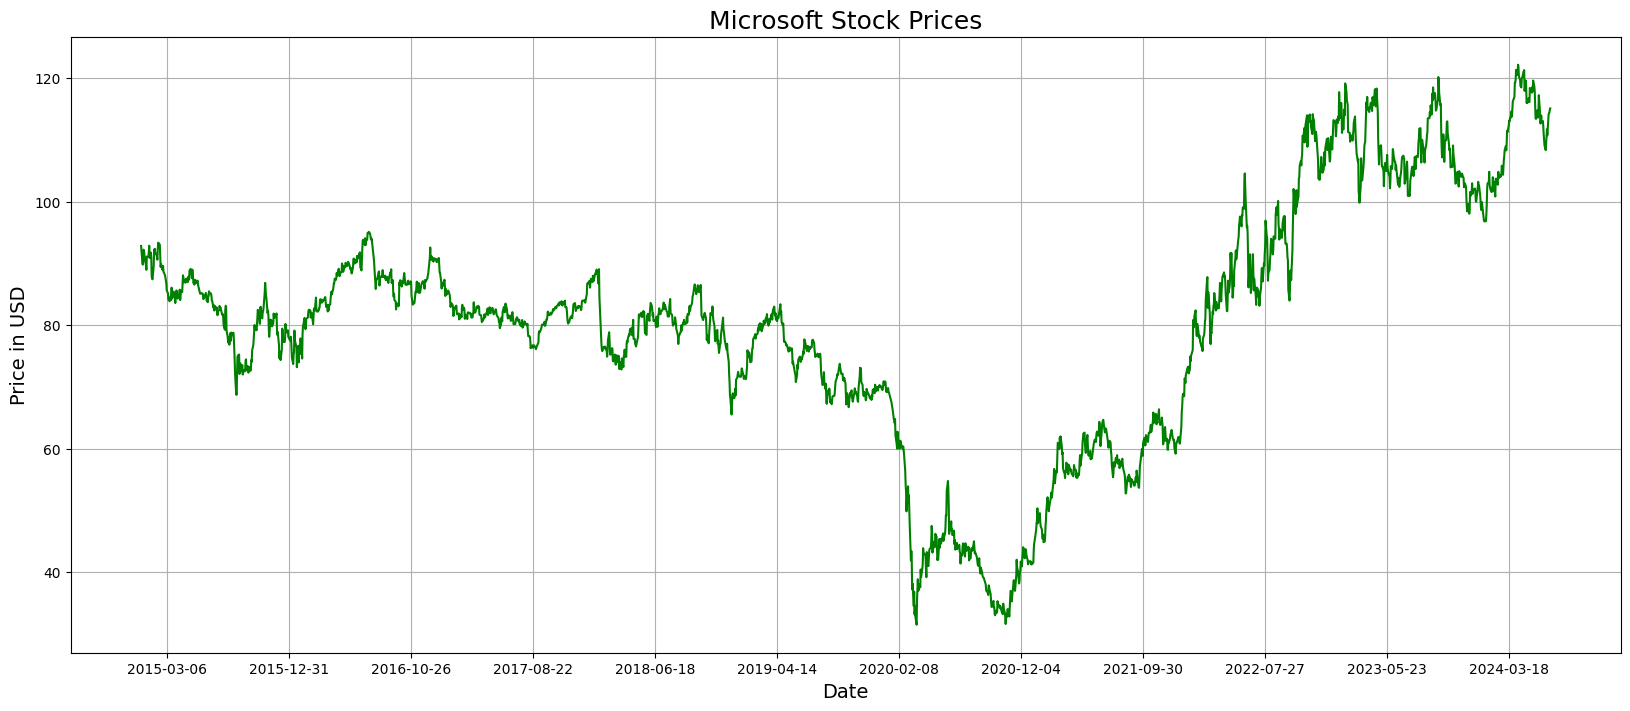

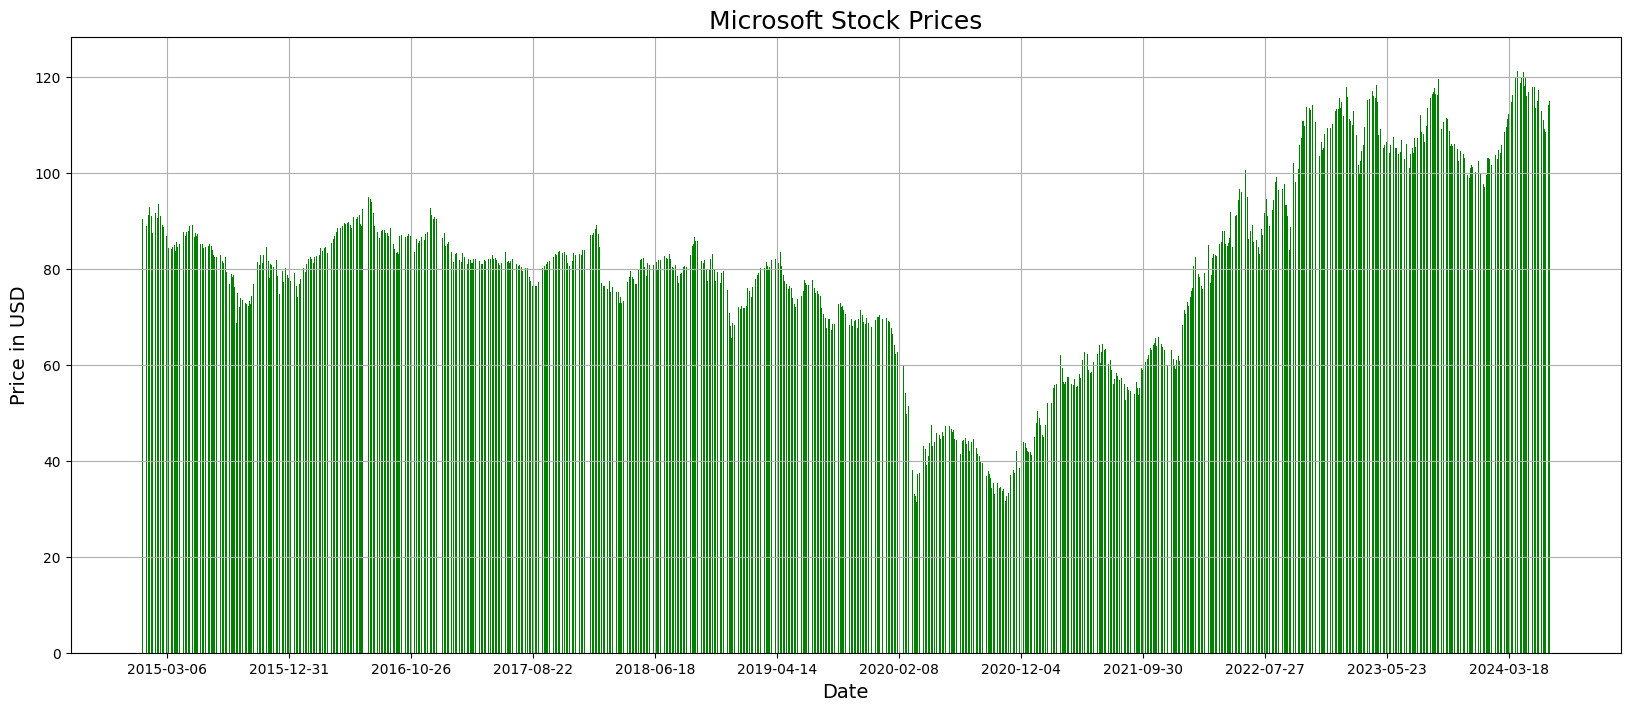

In [6]:
# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Microsoft Stock Prices', fontsize=18)
plt.grid()
plt.show()

# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Microsoft Stock Prices', fontsize=18)
plt.grid()
plt.show()

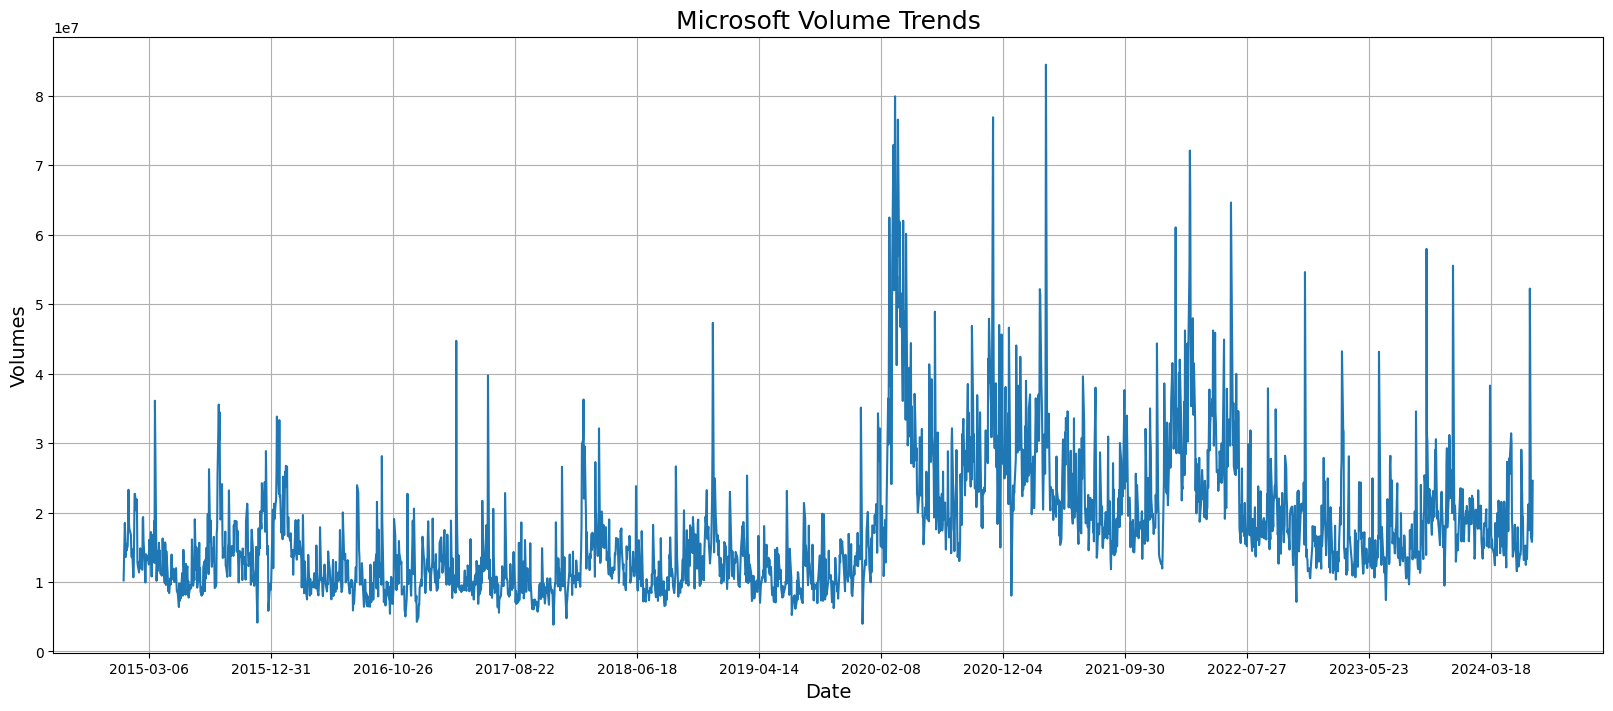

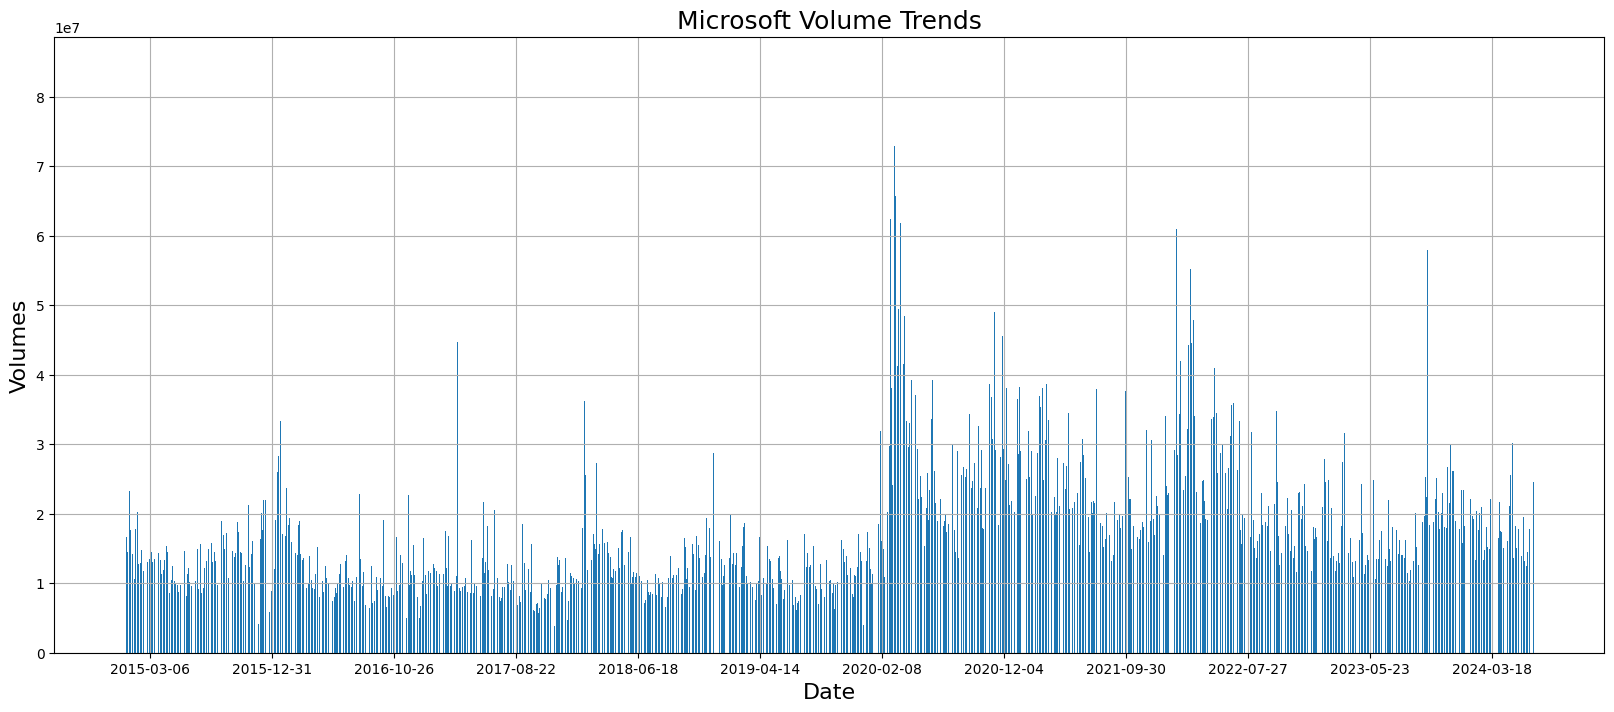

In [7]:
# Plotting the volume trends of Microsoft stock

# Line plot
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volumes', fontsize=14)
plt.title('Microsoft Volume Trends', fontsize=18)
plt.grid()
plt.show()

# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Volumes', fontsize=16)
plt.title('Microsoft Volume Trends', fontsize=18)
plt.grid()
plt.show()

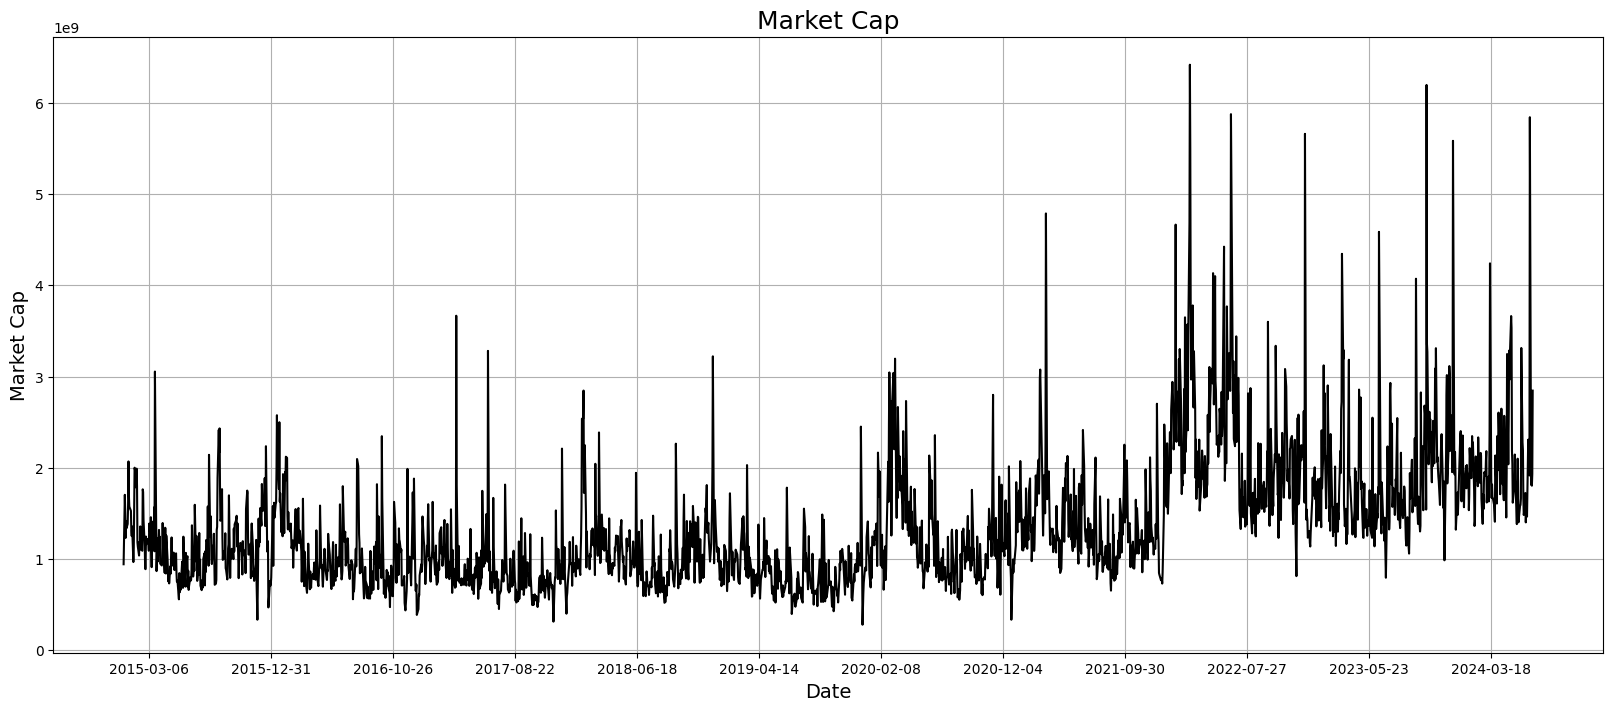

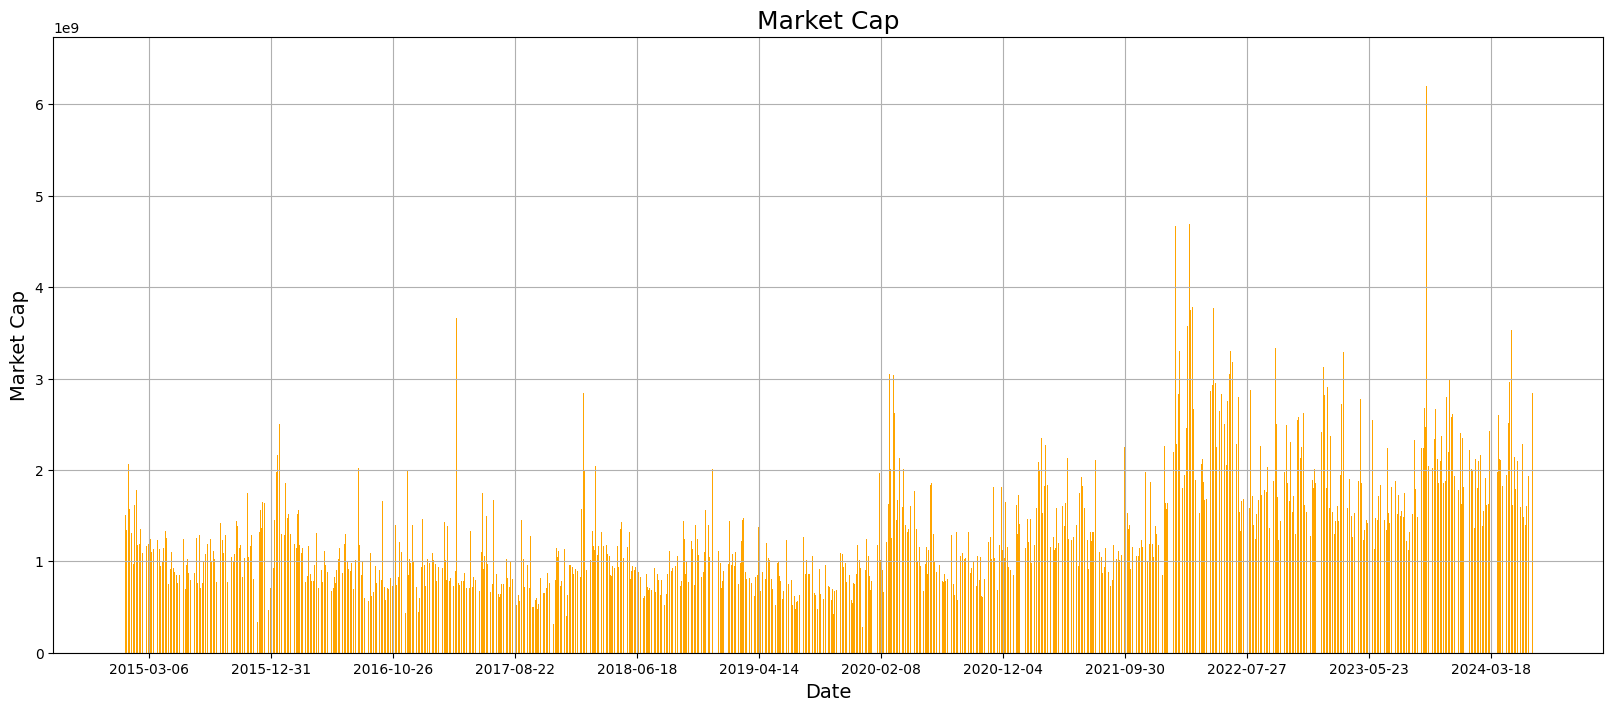

In [8]:
# Calculate the market capitalization
data['Market Cap'] = data['Open'] * data['Volume']

# Create the line plot for market capitalization
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['Market Cap'], color='black')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Market Cap', fontsize=14)
plt.title('Market Cap', fontsize=18)
plt.grid()
plt.show()

# Create the bar plot for market capitalization
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Market Cap', fontsize=14)
plt.title('Market Cap', fontsize=18)
plt.grid()
plt.show()

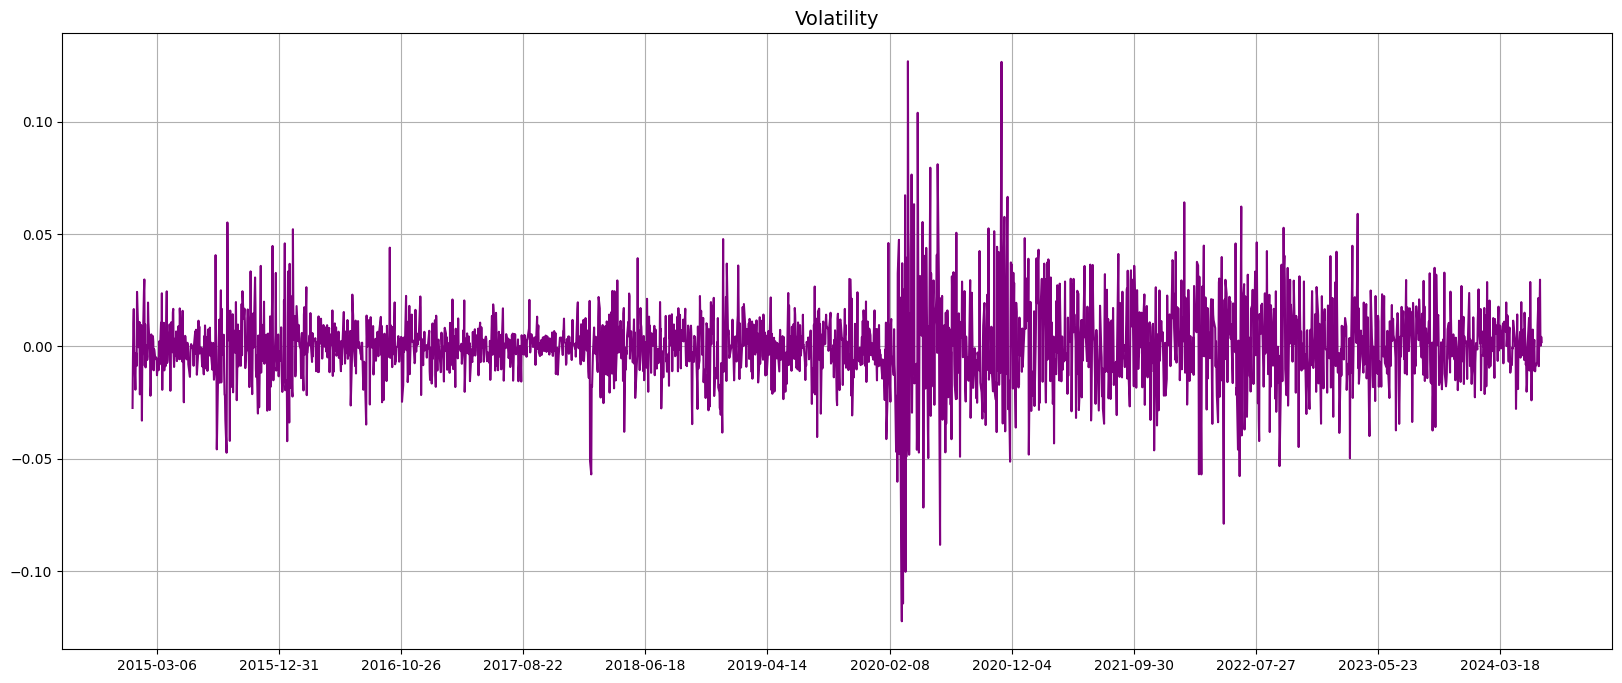

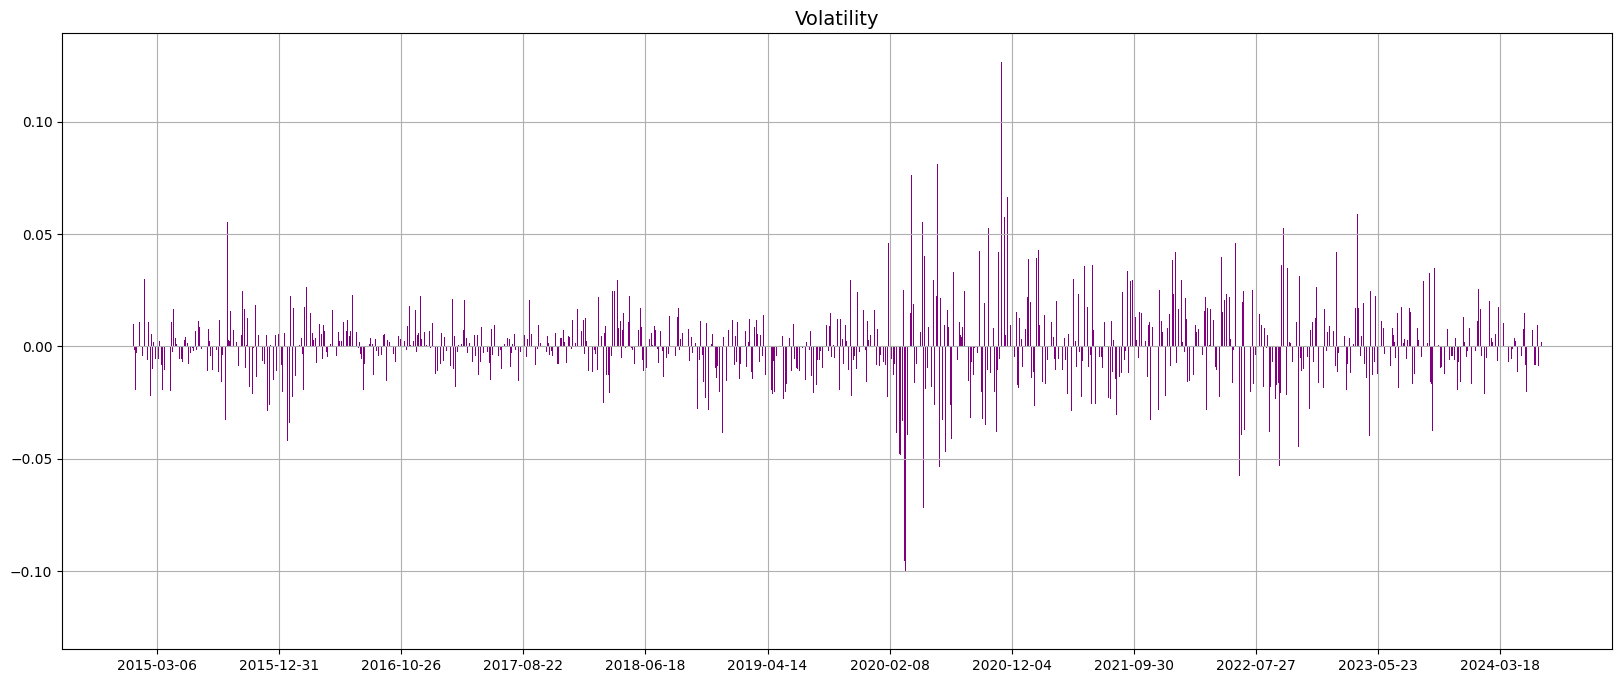

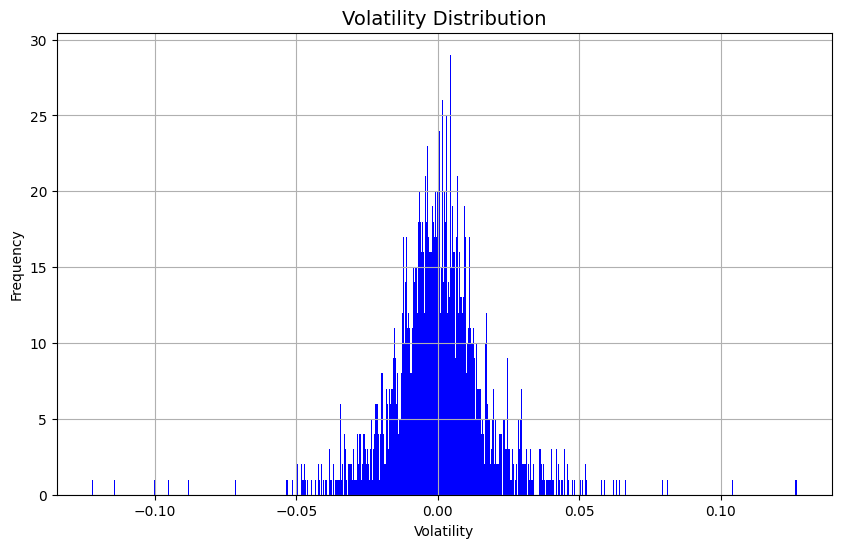

In [9]:
# Calculate the daily volatility
data['vol'] = (data['Close'] / data['Close'].shift(1)) - 1

# Create the line plot for volatility
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=14)
plt.grid()
plt.show()

# Create the bar plot for volatility
fig1, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=14)
plt.grid()
plt.show()

# Create the histogram for volatility
plt.figure(figsize=(10, 6))
data['vol'].hist(bins=1000, color='blue')
plt.title('Volatility Distribution', fontsize=14)
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

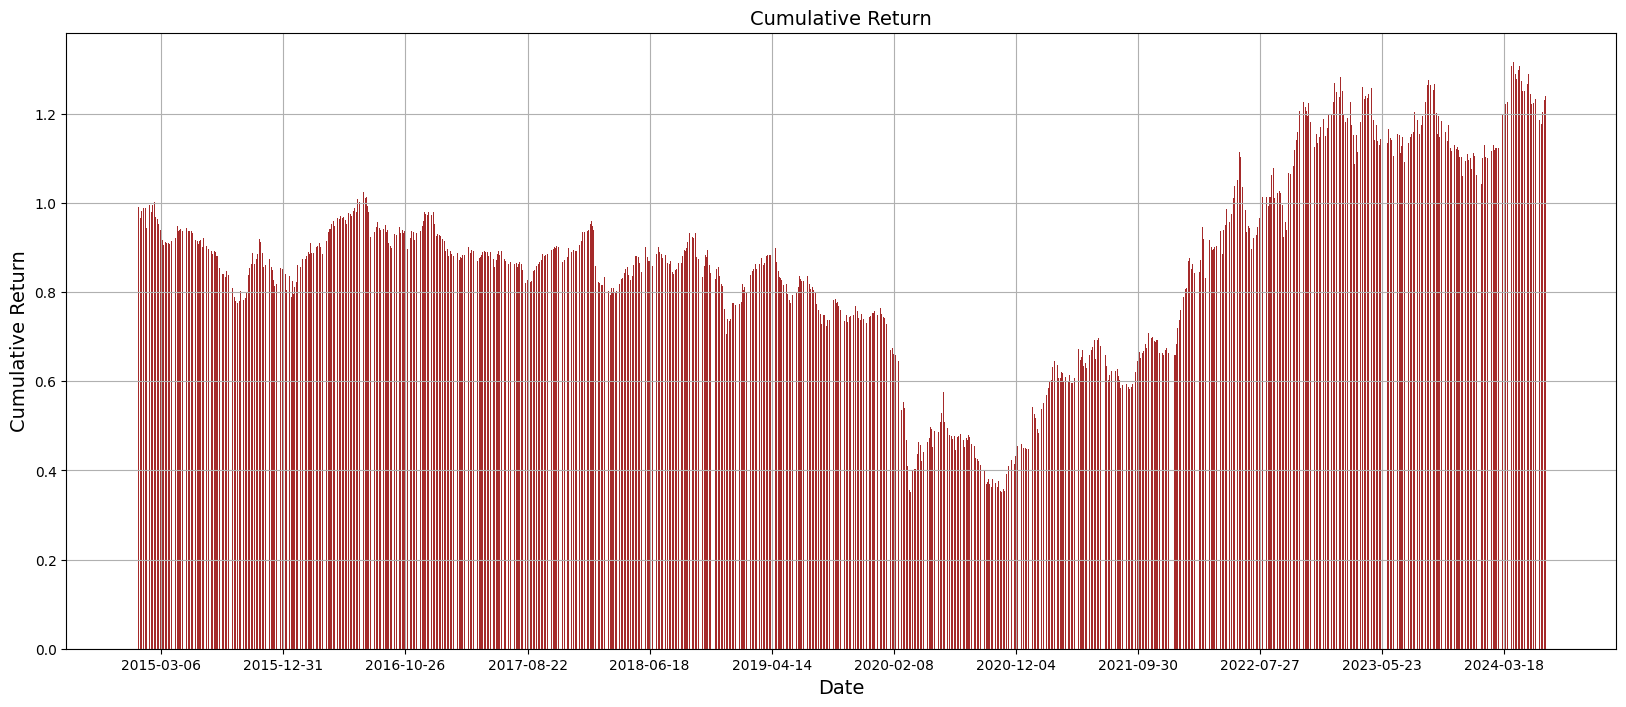

In [10]:
# Calculate the cumulative return
data['Cumulative Return'] = (1 + data['vol']).cumprod()

# Create the bar plot for cumulative return
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Cumulative Return'], color='Brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return', fontsize=14)
plt.title('Cumulative Return', fontsize=14)
plt.grid()
plt.show()

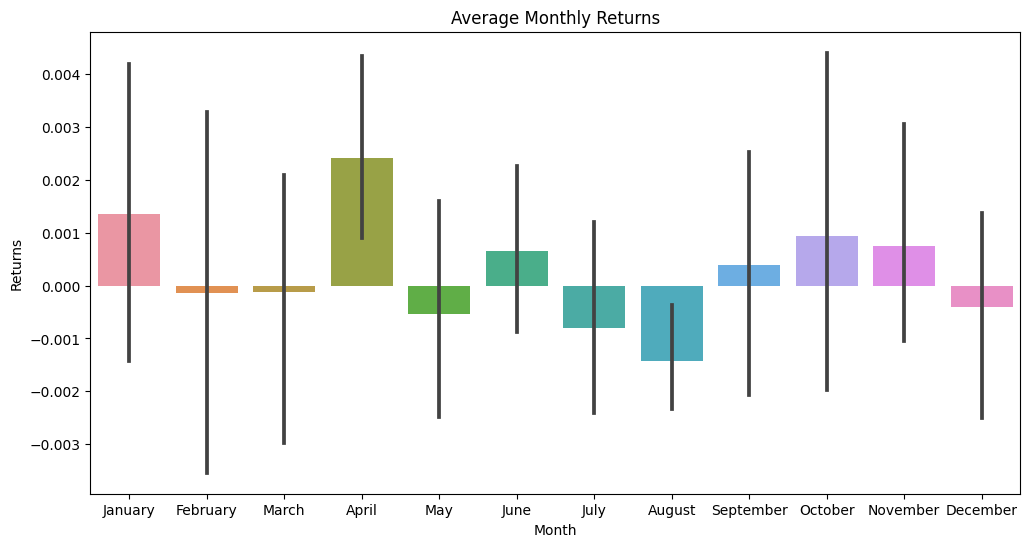

In [11]:
# Calculate the daily returns
data['Return'] = data['Close'].pct_change()

# Extract the month and year from the 'Date' column
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year

# Group the data by month and year and calculate the average return
monthly_returns = data.groupby(['Month', 'Year'])['Return'].mean().reset_index()

# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort the data by month order
monthly_returns['Month'] = pd.Categorical(monthly_returns['Month'], categories=month_order, ordered=True)
monthly_returns = monthly_returns.sort_values('Month')

# Create a bar plot of the average monthly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_returns, x='Month', y='Return')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

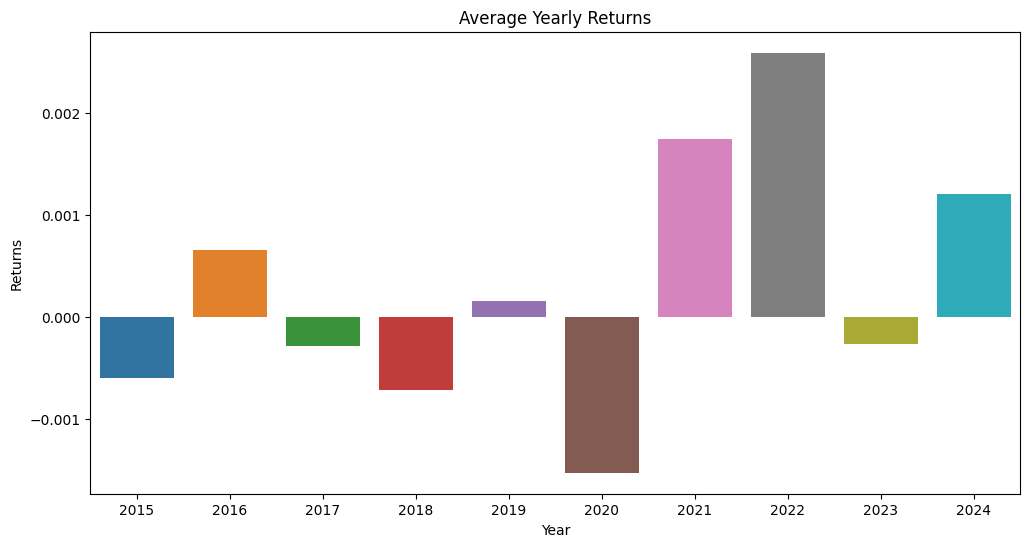

In [12]:
# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group the data by year and calculate the average return
yearly_returns = data.groupby(['Year'])['Return'].mean().reset_index()

# Sort the data by year
yearly_returns = yearly_returns.sort_values('Year')

# Create a bar plot of the average yearly returns
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_returns, x='Year', y='Return')
plt.title('Average Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

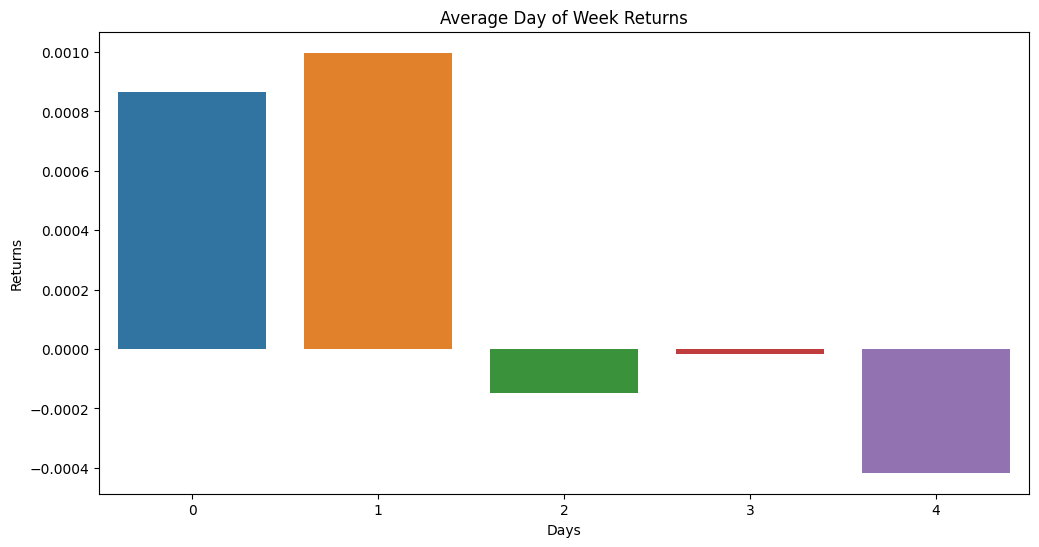

In [13]:
# Extract the day of the week from the 'Date' column
data['Day'] = data['Date'].dt.weekday

# Group the data by day of the week and calculate the average return
daily_returns = data.groupby(['Day'])['Return'].mean().reset_index()

# Sort the data by day of the week
daily_returns = daily_returns.sort_values('Day')

# Create a bar plot of the average daily returns
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_returns, x='Day', y='Return')
plt.title('Average Day of Week Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

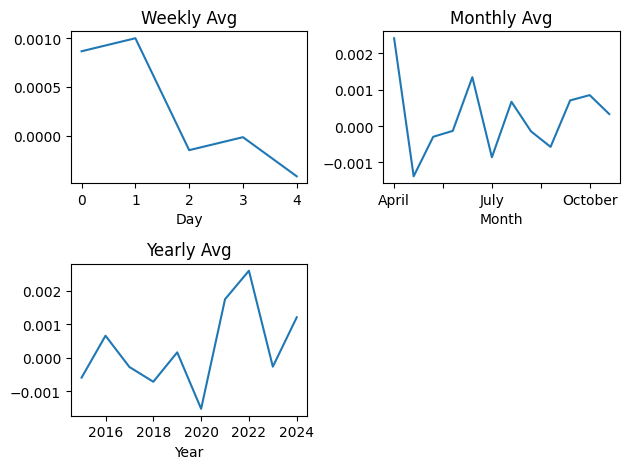

In [14]:
plt.subplot(221)
plt.title('Weekly Avg')
data.groupby('Day')['Return'].mean().plot()

plt.subplot(222)
plt.title('Monthly Avg')
data.groupby('Month')['Return'].mean().plot()

plt.subplot(223)
plt.title('Yearly Avg')
data.groupby('Year')['Return'].mean().plot()

plt.tight_layout()
plt.show()

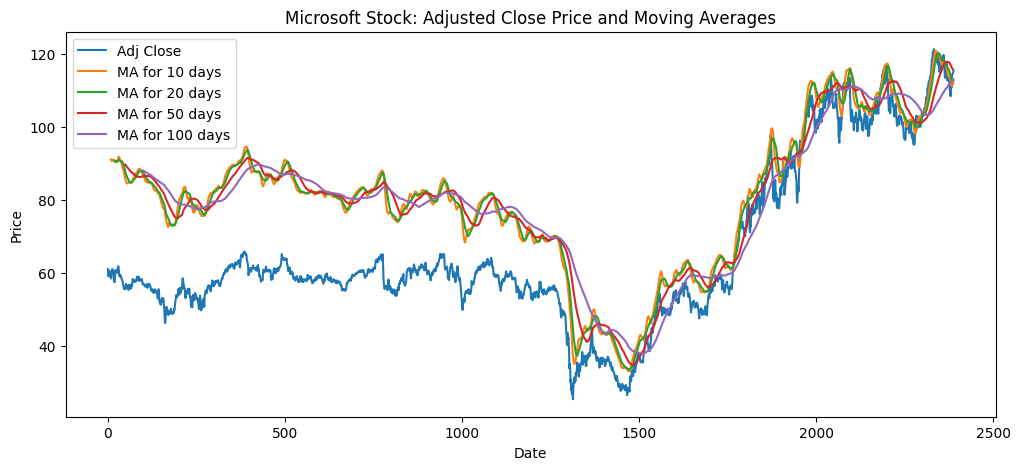

In [15]:
# Calculate moving averages for different windows
data['MA for 10 days'] = data['Open'].rolling(10).mean()
data['MA for 20 days'] = data['Open'].rolling(20).mean()
data['MA for 50 days'] = data['Open'].rolling(50).mean()
data['MA for 100 days'] = data['Open'].rolling(100).mean()

# Truncate the data if needed
truncated_data = data.truncate()

# Plot the adjusted close price and moving averages
truncated_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12, 5))

# Set the title and axis labels
plt.title('Microsoft Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

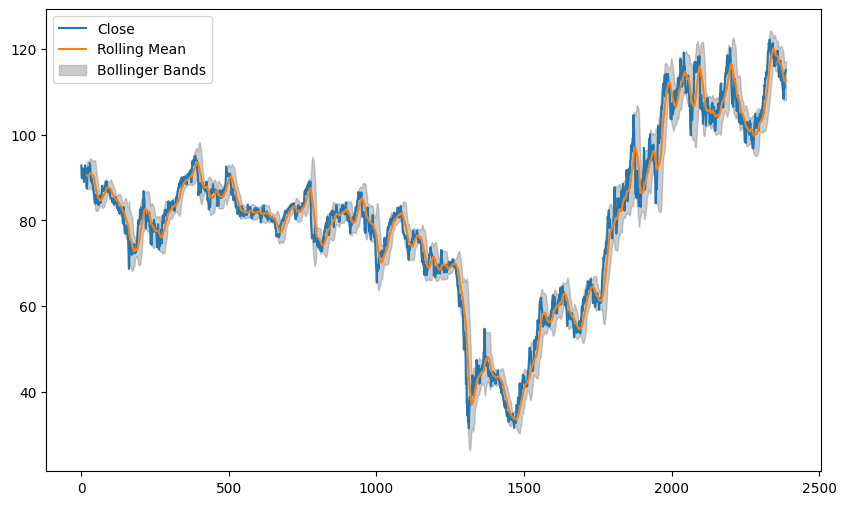

In [16]:
#plotting bollinger band
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data.index, data['Close'], label='Close')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
ax.fill_between(rolling_mean.index, upper_band, lower_band, alpha=0.4, color='gray', label='Bollinger Bands')
ax.legend()
plt.show()

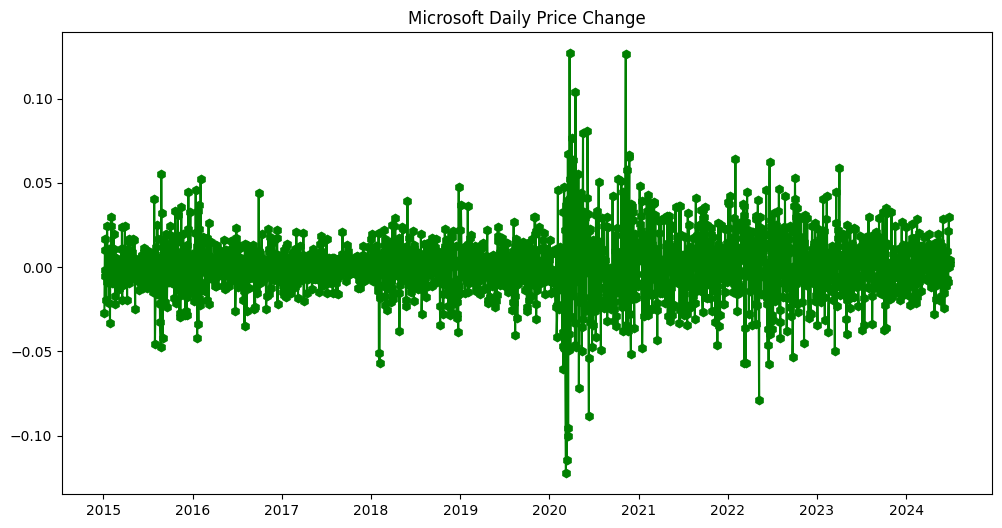

In [17]:
# Set the figure size of the chart
plt.figure(figsize=(12, 6))

# Plot the daily price change of Microsoft stock
plt.plot(data['Date'], data['Return'], marker='h', color='g')

# Set the title of the chart
plt.title('Microsoft Daily Price Change')

# This chart displays the daily price change of Microsoft stock over time.

# Display the chart
plt.show()

In [18]:
!pip install Prophet

In [19]:
df = data.reset_index()
# Selecting the 'Date' (ds) and 'Close' (y) columns from the stock_data DataFrame
df = data[['Date', 'Close']]

# Renaming columns for compatibility with Prophet
# 'Date' is renamed to 'ds' (datestamp), and 'Close' is renamed to 'y' (target variable)
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
# Instantiate Prophet model
from prophet import Prophet

m = Prophet()
# Fit the model with historical stock data
m.fit(df)  # The model is trained using the historical stock data
# Generate predictions for the future dates using the fitted model
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

06:46:26 - cmdstanpy - INFO - Chain [1] start processing
06:46:27 - cmdstanpy - INFO - Chain [1] done processing


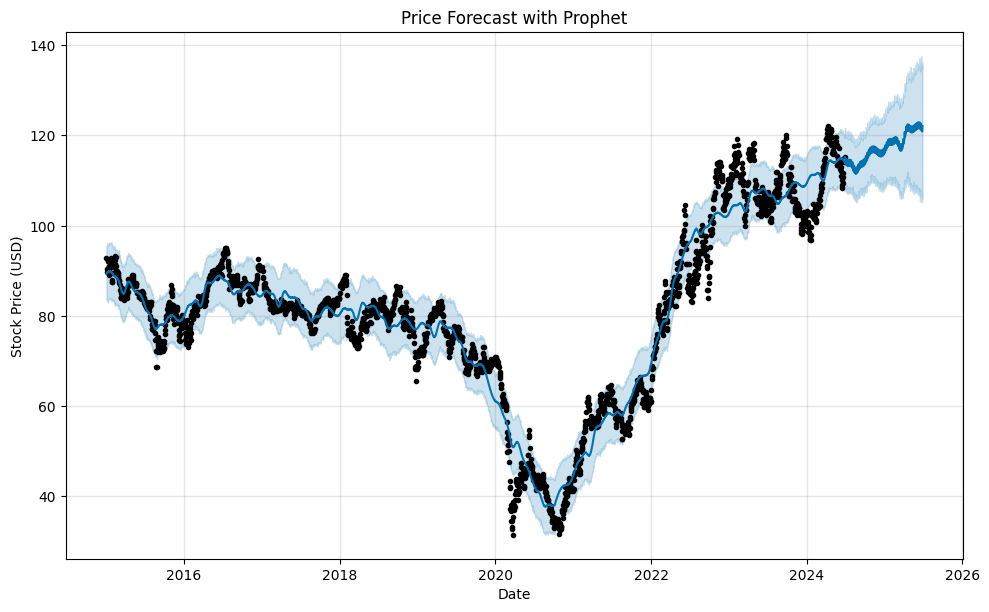

In [20]:
# Visualize the forecast
fig1 = m.plot(forecast)

# Add title to the plot
plt.title(f'Price Forecast with Prophet')

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
plt.ylabel('Stock Price (USD)')

# Display the plot
plt.show()